# FYS-STK4155 Project 1 
## Nanna Bryne and Johan M. Kroken
### Tentative work in jupyter notebook

/tmp/ipykernel_10658/1352466266.py:13: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


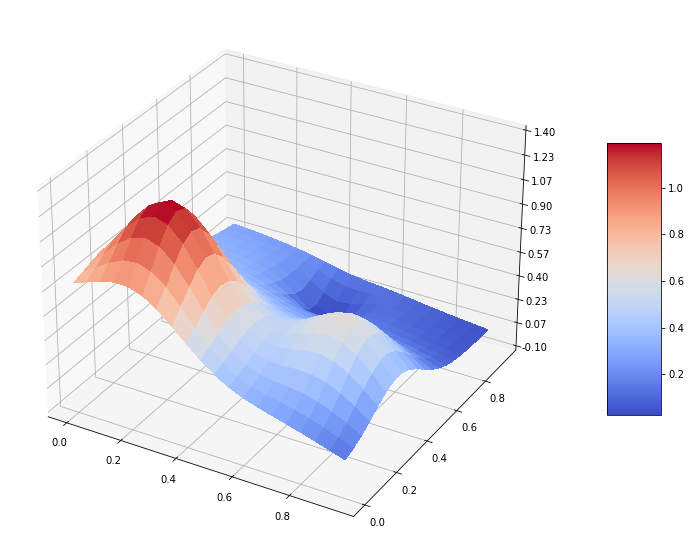

In [20]:
# Franke function
%matplotlib inline

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np
from random import random, seed

plt.rcParams['figure.figsize'] = [20, 10]
fig = plt.figure()
ax = fig.gca(projection='3d')

# Make data.
x = np.arange(0, 1, 0.05)
y = np.arange(0, 1, 0.05)
x, y = np.meshgrid(x,y)


def FrankeFunction(x,y):
    term1 = 0.75*np.exp(-(0.25*(9*x-2)**2) - 0.25*((9*y-2)**2))
    term2 = 0.75*np.exp(-((9*x+1)**2)/49.0 - 0.1*(9*y+1))
    term3 = 0.5*np.exp(-(9*x-7)**2/4.0 - 0.25*((9*y-3)**2))
    term4 = -0.2*np.exp(-(9*x-4)**2 - (9*y-7)**2)
    return term1 + term2 + term3 + term4


z = FrankeFunction(x, y)

# Plot the surface.
surf = ax.plot_surface(x, y, z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# Customize the z axis.
ax.set_zlim(-0.10, 1.40)
ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

In [21]:
#   Own code to fit the Franke-function using OLS and polynomial in x and y up to fifth order. 
#   Set up design matrix X

def fit_params(n=5):
    xx = np.ravel(x)
    yy = np.ravel(y)

    N = len(xx)
    l = int((n+1)*(n+2)/2)
    X = np.ones((N,l))

    for i in range(1, n+1):
        q = int((i)+(i+1)/2)
        for k in range(i+1):
            X[:,q+k] = (xx**(i-k))*(yy**k)


    H = X.T @ X
    beta = np.linalg.pinv(H) @ X.T @ z.ravel()

    ztilde = X @ beta 
    ztilde = np.reshape(ztilde, (20,20))
    print(f"Number of elements in beta: {l}")
    return ztilde



In [22]:
#   useful functions:
#   mean squared error
def MSE(data, model):
    n = np.size(data)
    return np.sum((data-model)**2)/n

#   r2 score
def R2(data, model):
    return 1 - np.sum((data - model) ** 2) / np.sum((data - np.mean(data)) ** 2)


n=2
Number of elements in beta: 6


/tmp/ipykernel_10658/1701987822.py:10: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


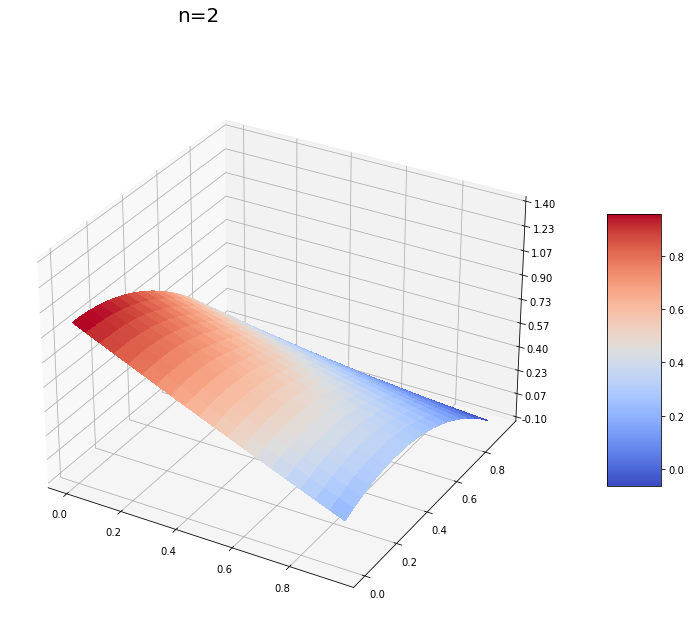

n=3
Number of elements in beta: 10


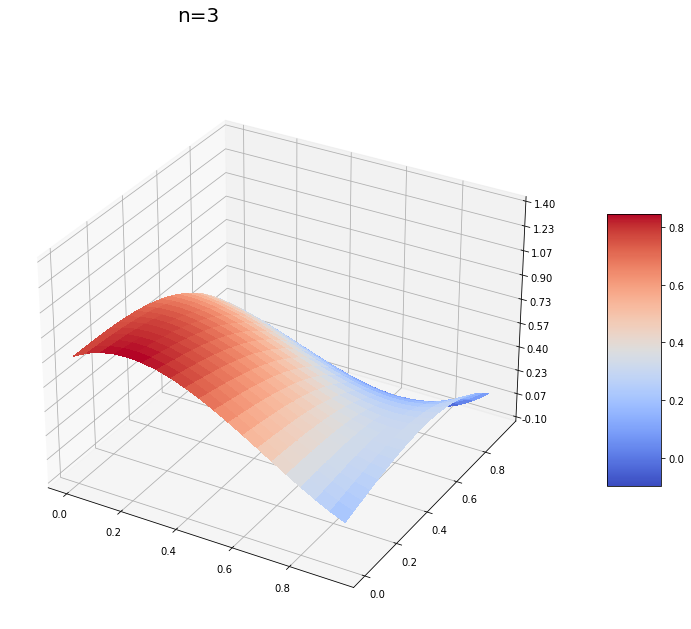

n=4
Number of elements in beta: 15


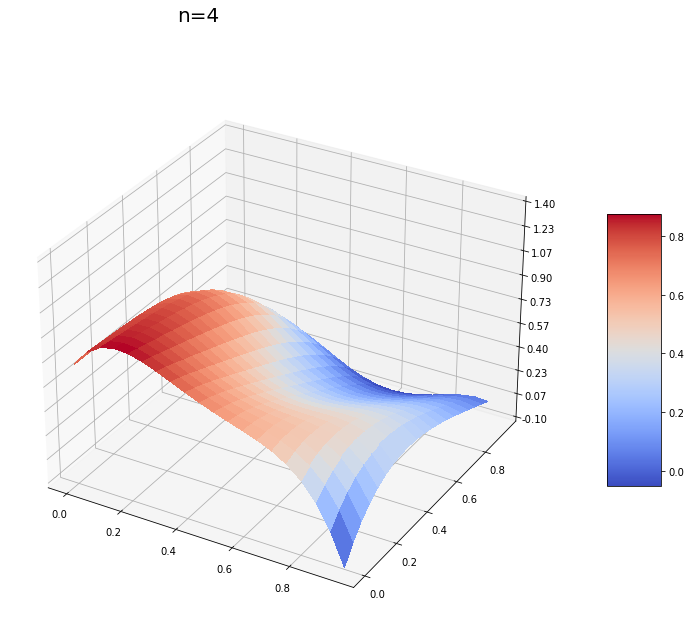

n=5
Number of elements in beta: 21


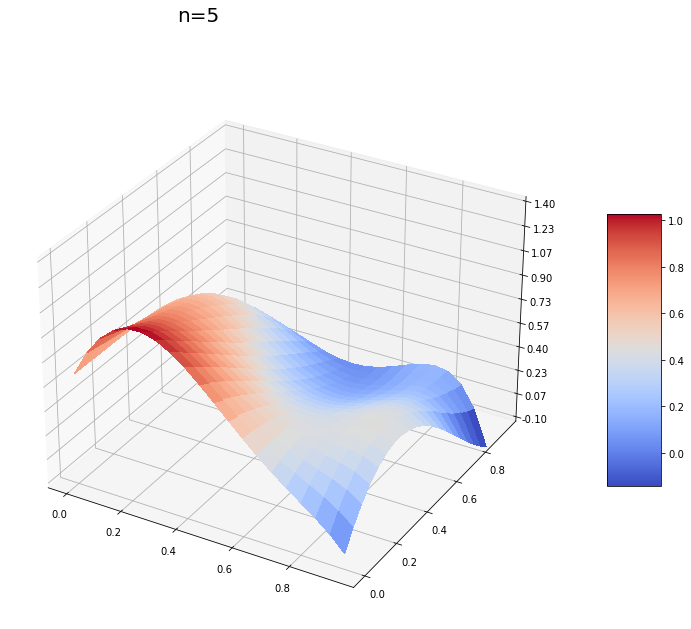

In [23]:
N = 5
mses = np.zeros(N-1)
r2s = np.zeros(N-1)
ns = np.zeros(N-1)
i = 0
for n in range(2,N+1):
    print(f"n={n}")
    ztilde = fit_params(n)
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    # Plot the surface.
    surf = ax.plot_surface(x, y, ztilde, cmap=cm.coolwarm,
                        linewidth=0, antialiased=False)

    # Customize the z axis.
    ax.set_zlim(-0.10, 1.40)
    ax.zaxis.set_major_locator(LinearLocator(10))
    ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
    fig.suptitle(f"n={n}", fontsize=20)

    # Add a color bar which maps values to colors.
    fig.colorbar(surf, shrink=0.5, aspect=5)
    mse = MSE(z.ravel(), ztilde.ravel())
    r2 = R2(z.ravel(), ztilde.ravel())
    mses[i] = mse 
    r2s[i] = r2 
    ns[i] = n

    plt.show()

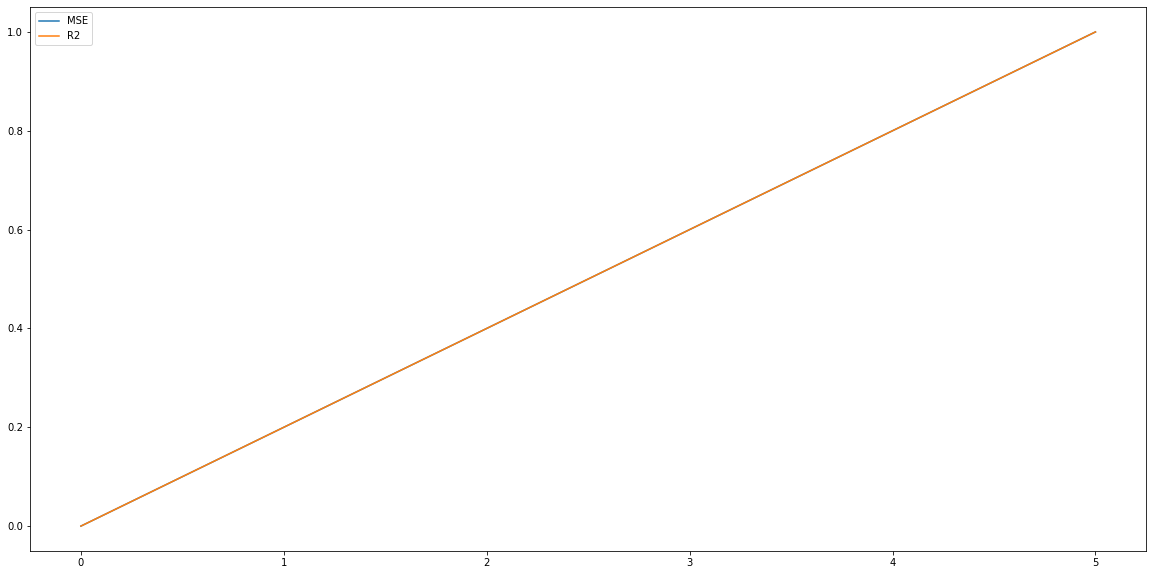

In [28]:
fig, ax = plt.subplots()
plt.plot(ns, mses/mses.max(), label="MSE")
plt.plot(ns, r2s/r2s.max(), label="R2")
plt.legend()
# plt.tight_layout()
plt.show()